# Probability Distributions

### Homework Solutions

Before you begin, remember to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

1. Using the appropriate `numpy` function: 
    1. generate one coin toss from a fair coin
    2. write a function `my_toss()` that every time it's called, prints out 'Heads!' or 'Tails!' (Heads = 1); make sure to test it by calling the function `my_toss()`
    3. generate 10 coin tosses from a fair coin and show each toss' result in a list
    4. generate 10 coin tosses from a coin that gives heads 70% of the times and show each toss' result in a list

In [10]:
#1a. 
np.random.binomial(1, 0.5)

1

In [11]:
#1b.
def my_toss(): 
    if np.random.binomial(1, 0.5) == 1: 
        print('Heads!')
    else: 
        print('Tails!')

In [20]:
my_toss()

Tails!


In [21]:
#1c.
np.random.binomial(1, 0.5, 10)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [22]:
#1d. 
np.random.binomial(1, 0.7, 10)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

2. Simulate the toss of 100 fair coins in 10,000 different experiments and save the results in a list named `fair`, then plot the histogram to show its underlying distribution. What does it look like? Describe it. 

In [23]:
fair = np.random.binomial(100, 0.5, 10000)

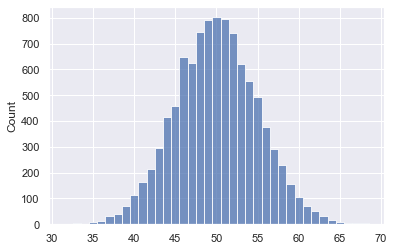

In [24]:
bins_fair = [el-0.5 for el in list(set(fair))]
sns.histplot(fair, bins = bins_fair)
plt.show()

3. Simulate the toss of 100 unfair coins ($p=0.75$) in 10,000 different experiments and save the results in a list named `unfair`, then plot its histogram next to the one of the `fair` coin tosses. What can you say about the two distributions? *Hint: the `.set_xlim()` method could be useful to extend the x-axis*

In [25]:
unfair = np.random.binomial(100, 0.75, 10000)

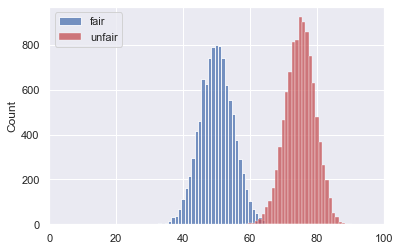

In [27]:
bins_unfair = [el-0.5 for el in list(set(unfair))]
ax = sns.histplot(fair, bins = bins_fair, label = 'fair')
ax.set_xlim([0, 100])
sns.histplot(unfair, bins = bins_unfair, label = 'unfair', color='r')
ax.legend(loc=2)
plt.show()

4. Consider this simple experiment: you take a coin and toss it 10 times. Now imagine you keep running this experiment until you get 10 heads in a row. Write a program that keeps tossing 10 coins until it reaches 10 heads and, once it has done so, prints to screen something like *"Reached 10 straight heads after 307 tosses!"*.

In [59]:
cnt = 0
ct = 0
while ct < 10: 
    ct = np.random.binomial(10, 0.5)
    cnt += 1
print('Reached', ct, 'straight heads after', cnt, 'tosses!')

Reached 10 straight heads after 867 tosses!


5. Using the function `np.random.choice()`, simulate the roll of a die (that outputs values from 1 to 6); then, write a program that simulates 1000 rolls. What does it look like? Does it make sense to you? It should look different from any distribution we've seen so far, in fact, you shoud have generated a [Uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) and it should look similar to [this one](https://www.newtechdojo.com/wp-content/uploads/2020/06/Pro-Pic-6-1024x617.png).

In [ ]:
rolls = []
for roll in range(1000): 
    rolls.append(np.random.choice(6)+1)

In [ ]:
sns.histplot(rolls)
plt.show()

6. Generate a simulated dataset `df_sim` that contains data about 1000 fictitious survey respondents and 4 columns, specified as follows: 

- `id`: this is a progressive number starting from 1001
- `gender`: the gender of the respondent represented as 1 or 0 (assume that the probability of 1 is $p=0.5042$)
- `height`: the height of the respondent (assume it comes from a Normal distribution with $\mu=170$ and $\sigma^2=100$)
- `eyes`: choose randomly between ['green', 'blue', 'hazel', 'brown', 'other'] using the following probabilities [0.03, 0.1, 0.1, 0.7, 0.07]
- `score` the number of questions the respondent was able to answer to in the first 10 minuts (assume it comes from a Poisson distribution with $\lambda=7$ and $n=1000$)

In [ ]:
df_sim = pd.DataFrame({'id': range(1, 1001), 
                      'gender': np.random.binomial(1, 0.5042, 1000), 
                      'height': np.random.normal(170, 10, 1000), 
                      'eyes': np.random.choice(['green', 'blue', 'hazel', 'brown', 'other'], 
                                              p=[0.03, 0.1, 0.1, 0.7, 0.07]), 
                      'score': np.random.poisson(7, 1000)})

In [ ]:
df_sim

7. Write a function `tosses10()` that, every time it is executed, it returns the `cnt` value from question 4. Run a simulation of 1000 experiments where, at every iteration, you run the `tosses10()` function and append the result to a list named `rounds`. Plot the density of the resulting distribution of the new `rounds` object. What does it look like? What can you tell about the underlying data?

In [ ]:
def tosses10(): 
    cnt = 0
    ct = 0
    while ct < 10: 
        ct = np.random.binomial(10, 0.5)
        cnt += 1
    return cnt

In [ ]:
rounds = [tosses10() for round in range(1000)]

In [ ]:
sns.kdeplot(rounds)

8. [Bonus]: Create a script that simulates a [Magic 8 Ball](https://en.wikipedia.org/wiki/Magic_8_Ball), an oracle from the 50's used for fortune-telling and seeking advice.

Make sure the ball has the following features: 

- it allows the user to input his/her question;
- it uses the responses from the `responses` list provided below; 
- it selects from the `responses` list in a biased manner, giving mostly negative (or positive, if you prefer) replies.

In [60]:
responses = ["It is certain", "It is decidedly so", "Without a doubt", "Yes, definitely",
             "You may rely on it", "As I see it, yes", "Most Likely", "Outlook Good",
             "Yes", "Signs point to yes", "Reply hazy, try again", "Ask again later",
             "Better not tell you now", "Cannot predict now", "Concentrate and ask again",
             "Don't count on it", "My reply is no", "My sources say no", "Outlook not so good", "Very Doubtful"]

In [66]:
def ask_question(): 
    question = input("You may ask your yes or no question of the Magic 8 Ball!\n")
    prob = [el for el in range(1, 21)]
    prob = [el/sum(prob) for el in prob]
    print(np.random.choice(responses, p=prob))

In [67]:
ask_question()

You may ask your yes or no question of the Magic 8 Ball!
 gli esercizi saranno facili?


Very Doubtful
